# Student Performance

Jade Chen 22411268

<span style="color:red">

- TODO: justify why not including other variables
- TODO: be careful of including categorical variables in heat map bc may be wrong (TODO - why)
- TODO: check indent
- TODO: check |>
</span>

![Student Performance](https://github.com/jadeeechen/STAT-301-Project-2023W1-/blob/main/studentperformance.jpg?raw=true)
Source: Youtube - Ma. Israelle S. Lopez

## PART I - DATA AND QUESTIONS

### Description

The data includes two datasets about student performance. The data is taken from two Portuguese secondary schools and collected through school reports and questionnaires. One dataset is about “Mathematics” and the other is about “Portuguese Language”.

For our project, we are only using the dataset on “Mathematics”.

### Source

The original dataset was taken from the following link:
https://archive.ics.uci.edu/dataset/320/student+performance

The dataset is read in from the following link (personal GitHub):
https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv

### Research Question
<span style="color:red"> (Predict) Can family background and study habits predict a students' final grade in Mathematics?</span>

1. Response Variable (Dependent Variable)
    - `G3` (Final Grade)

2. Explanatory Variables (Independent Variables)
    - Family Background: `Internet` (Internet Access at Home)
    - Study Habits: `StudyTime` (Weekly Study Time)
    
* Note: There are multiple variables that can be used for both family background and study habits, here, it has been narrowed down to one variable each.

### Importing Packages

In [1]:
library(tidyverse)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Read Data
Read in data from the web, split by delimiter `;` to have one feature per column, and show the first 3 observations.

In [82]:
url = 'https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv'
data <- read_csv(url) |>
    separate_wider_delim(cols = 'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3',
                         delim = ";",
                         names = c('School', 'Sex', 'Age', 'Address', 'FamilySize', 'PStatus', 'MEdu', 'FEdu', 'MJob', 'FJob', 'Reason', 'Guardian', 'TravelTime', 'StudyTime', 'Failures', 'SchoolSupport', 'FamSupport', 'Paid', 'Activities', 'Nursery', 'Higher', 'Internet', 'Romantic', 'FamRel', 'FreeTime', 'GoOut', 'DAlch', 'WAlch', 'Health', 'Absences', 'G1', 'G2', 'G3')
                        )
head(data, 3)

Rows: 395 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;g...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


School Sex Age Address FamilySize PStatus MEdu FEdu MJob    FJob    ⋯ FamRel
1 GP     F   18  U       GT3        A       4    4    at_home teacher ⋯ 4     
2 GP     F   17  U       GT3        T       1    1    at_home other   ⋯ 5     
3 GP     F   15  U       LE3        T       1    1    at_home other   ⋯ 4     
  FreeTime GoOut DAlch WAlch Health Absences G1 G2 G3
1 3        4     1     1     3      6        5  6  6 
2 3        3     1     1     3      4        5  5  6 
3 3        2     2     3     3      10       7  8  10

In [ ]:
### Drop Features

Since we are only interested in the final grade `G3`, we shall drop the first and second period grades `G1` and `G2`.

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7: unexpected symbol
2: 
3: Since we
         ^


### Number of Observations
With the `unique()` function, possible duplicate values present in data frame were eliminated. There are 395 unique observations. 

In [84]:
nrow(unique(data))

[1] 395

### Feature Details
Below is the detailed description for possible values of each 33 features.

1. `School`: Student's School
    - GP - Gabriel Pereira
    - MS - Mousinho da Silveira
2. `Sex`: Student's Sex
    - F - female
    - M - male
3. `Age`: Student's Age
    - from 15 to 22
4. `Address`: Student's Home Address Type
    - U - urban
    - R - rural
5. `FamilySize`: Family Size
    - LE3 - less or equal to 3
    - GT3 - greater than 3
6. `Pstatus`: Parent's Cohabitation Status
    - T - living together
    - A - apart
7. `MEdu`: Mother's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
8. `FEdu`: Father's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
9. `MJob`: Mother's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
10. `FJob`: Father's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
11. `Reason`: Reason to Choose This School
    - home - close to home
    - reputation - school reputation
    - course - course preference
    - other
12. `Guardian`: Student's Guardian
    - mother
    - father
    - other
13. `TravelTime`: Home to School Travel Time
    - 1 - <15 min.
    - 2 - 15 to 30 min.
    - 3 - 30 min. to 1 hour
    - 4 - >1 hour
14. `StudyTime`: Weekly Study Time
    - 1 - <2 hours
    - 2 - 2 to 5 hours
    - 3 - 5 to 10 hours
    - 4 - >10 hours
15. `Failures`: Number of Past Class Failures
    - n if: 1 <= n < 3
    - else: 4
16. `SchoolSup`: Extra Educational Support
    - yes
    - no
17. `FamSup`: Family Educational Support
    - yes
    - no
18. `Paid`: Extra Paid Classes within the Course Subject
    - yes
    - no
19. `Activities`: Extra-Curricular Activities
    - yes
    - no
20. `Nursery`: Attended Nursery School
    - yes
    - no
21. `Higher`: Wants to Take Higher Education
    - yes
    - no
22. `Internet`: Internet Access at Home
    - yes
    - no
23. `Romantic`: With a Romantic Relationship
    - yes
    - no
24. `FamRel`: Quality of Family Relationships
    - 1 (very bad) to 5 (excellent)
25. `FreeTime`: Free Time After School
    - 1 (very low) to 5 (very high)
26. `GoOut`: Going Out with Friends
    - 1 (very low) to 5 (very high)
27. `DAlch`: Workday Alchohol Consumption
    - 1 (very low) to 5 (very high)
28. `WAlch`: Weekend Alchohol Consumption
    - 1 (very low) to 5 (very high)
29. `Health`: Current Health Status
    - 1 (very bad) to 5 (very good)
30. `Absences`: Number of School Absences
    - 0 to 93
31. `G1`: First Period Grade
    - 0 to 20
32. `G2` Second Period Grade
    - 0 to 20
33. `G3` Final Grade
    - 0 to 20

### Data Wrangling
For ease of the following descriptions, the relevant features were converted to numeric/factor type according to the "Additional Variable Information" from the dataset source.

In [85]:
#Binary -> Factor Type
data$School <- as.factor(data$School)
data$Sex <- as.factor(data$Sex)
data$Address <- as.factor(data$Address)
data$FamilySize <- as.factor(data$FamilySize)
data$PStatus <- as.factor(data$PStatus)
data$SchoolSupport <- as.factor(data$SchoolSupport)
data$FamSupport <- as.factor(data$FamSupport)
data$Paid <- as.factor(data$Paid)
data$Activities <- as.factor(data$Activities)
data$Nursery <- as.factor(data$Nursery)
data$Higher <- as.factor(data$Higher)
data$Internet <- as.factor(data$Internet)
data$Romantic <- as.factor(data$Romantic)

#Nominal -> Factor Type
data$MJob <- as.factor(data$MJob)
data$FJob <- as.factor(data$FJob)
data$Reason <- as.factor(data$Reason)
data$Guardian <- as.factor(data$Guardian)

#Numeric -> Numeric Type
data$Age <- as.numeric(data$Age)
data$MEdu <- as.numeric(data$MEdu)
data$FEdu <- as.numeric(data$FEdu)
data$TravelTime <- as.numeric(data$TravelTime)
data$StudyTime <- as.numeric(data$StudyTime)
data$Failures <- as.numeric(data$Failures)
data$FamRel <- as.numeric(data$FamRel)
data$FreeTime <- as.numeric(data$FreeTime)
data$GoOut <- as.numeric(data$GoOut)
data$DAlch <- as.numeric(data$DAlch)
data$WAlch <- as.numeric(data$WAlch)
data$Health <- as.numeric(data$Health)
data$Absences <- as.numeric(data$Absences)
data$G3 <- as.numeric(data$G3)

### Feature Information
In total, there are 33 features. The following dataframe shows the name, the number of unique values, and the type of each feature.

In [86]:
num_unique <- lapply(data, function(x) length(unique(x)))
column_types <- lapply(data, function(x) class(x))

result_df <- data.frame(
    NumUnique = unlist(num_unique),
    DataType = unlist(column_types)
)
result_df

NumUnique DataType
School         2        factor  
Sex            2        factor  
Age            8        numeric 
Address        2        factor  
FamilySize     2        factor  
PStatus        2        factor  
MEdu           5        numeric 
FEdu           5        numeric 
MJob           5        factor  
FJob           5        factor  
Reason         4        factor  
Guardian       3        factor  
TravelTime     4        numeric 
StudyTime      4        numeric 
Failures       4        numeric 
SchoolSupport  2        factor  
FamSupport     2        factor  
Paid           2        factor  
Activities     2        factor  
Nursery        2        factor  
Higher         2        factor  
Internet       2        factor  
Romantic       2        factor  
FamRel         5        numeric 
FreeTime       5        numeric 
GoOut          5        numeric 
DAlch          5        numeric 
WAlch          5        numeric 
Health         5        numeric 
Absences      34        numeric 
G3            18        numeric

### Unique Values of Factor Features
Furthermore, we can see the possible unique values of each factor feature.

In [87]:
data_factor <- select_if(data, is.factor)
ulst <- lapply(data_factor, function(x) unique(as.character(x)))
ulst

$School
[1] "GP" "MS"

$Sex
[1] "F" "M"

$Address
[1] "U" "R"

$FamilySize
[1] "GT3" "LE3"

$PStatus
[1] "A" "T"

$MJob
[1] "at_home"  "health"   "other"    "services" "teacher" 

$FJob
[1] "teacher"  "other"    "services" "health"   "at_home" 

$Reason
[1] "course"     "other"      "home"       "reputation"

$Guardian
[1] "mother" "father" "other" 

$SchoolSupport
[1] "yes" "no" 

$FamSupport
[1] "no"  "yes"

$Paid
[1] "no"  "yes"

$Activities
[1] "no"  "yes"

$Nursery
[1] "yes" "no" 

$Higher
[1] "yes" "no" 

$Internet
[1] "no"  "yes"

$Romantic
[1] "no"  "yes"

### Range of Numeric Features
For numeric features, we can further see the range of each feature.

In [88]:
# Subset numeric columns
data_numeric <- select_if(data, is.numeric)
data.frame(Min = sapply(data_numeric,min),
           Max = sapply(data_numeric,max))

Min Max
Age        15  22 
MEdu        0   4 
FEdu        0   4 
TravelTime  1   4 
StudyTime   1   4 
Failures    0   3 
FamRel      1   5 
FreeTime    1   5 
GoOut       1   5 
DAlch       1   5 
WAlch       1   5 
Health      1   5 
Absences    0  75 
G3          0  20

## PART II -  Exploratory Data Analysis and Visualization

###  Exploratory Data Analysis

#### Pair Plots

First, we use pair plots to simultaneously visualize the relationships between multiple pairs of variables in our dataset.

In this case, we've selected `Internet` `StudyTime` `G3`, according to our initial research question: Can family background `Internet` and study habits `StudyTime` predict a students' final grade `G3`in Mathematics?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


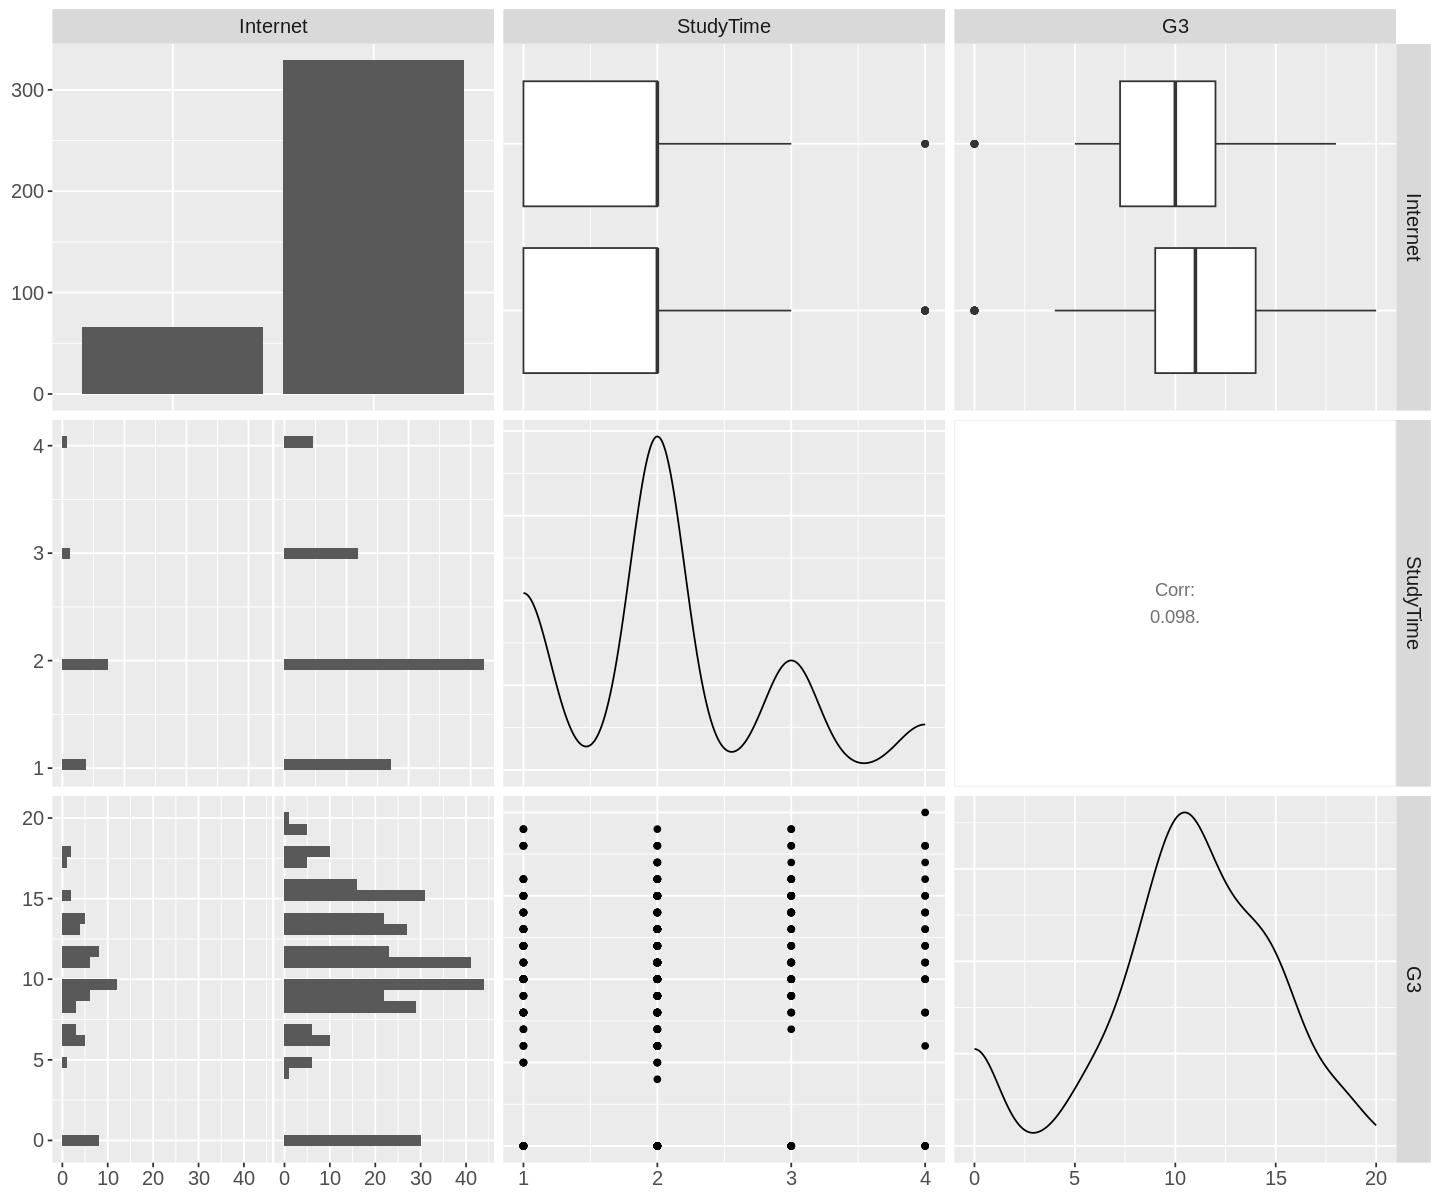

In [89]:
pair_plots <- data |>
    select(Internet, StudyTime, G3) |>
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
pair_plots

**Interpretation**

There does not appear to be a significant relationship between study habits `StudyTime` and final grade `G3`.

However, it appears that there is a relationship between the access to internet `Internet` and final grade `G3`.

Next, we will use a more detailed box plot to explore this relationship.

#### Box Plots

We use a box plot to examine the relationship between internet access `Internet` and final grade `G3`.

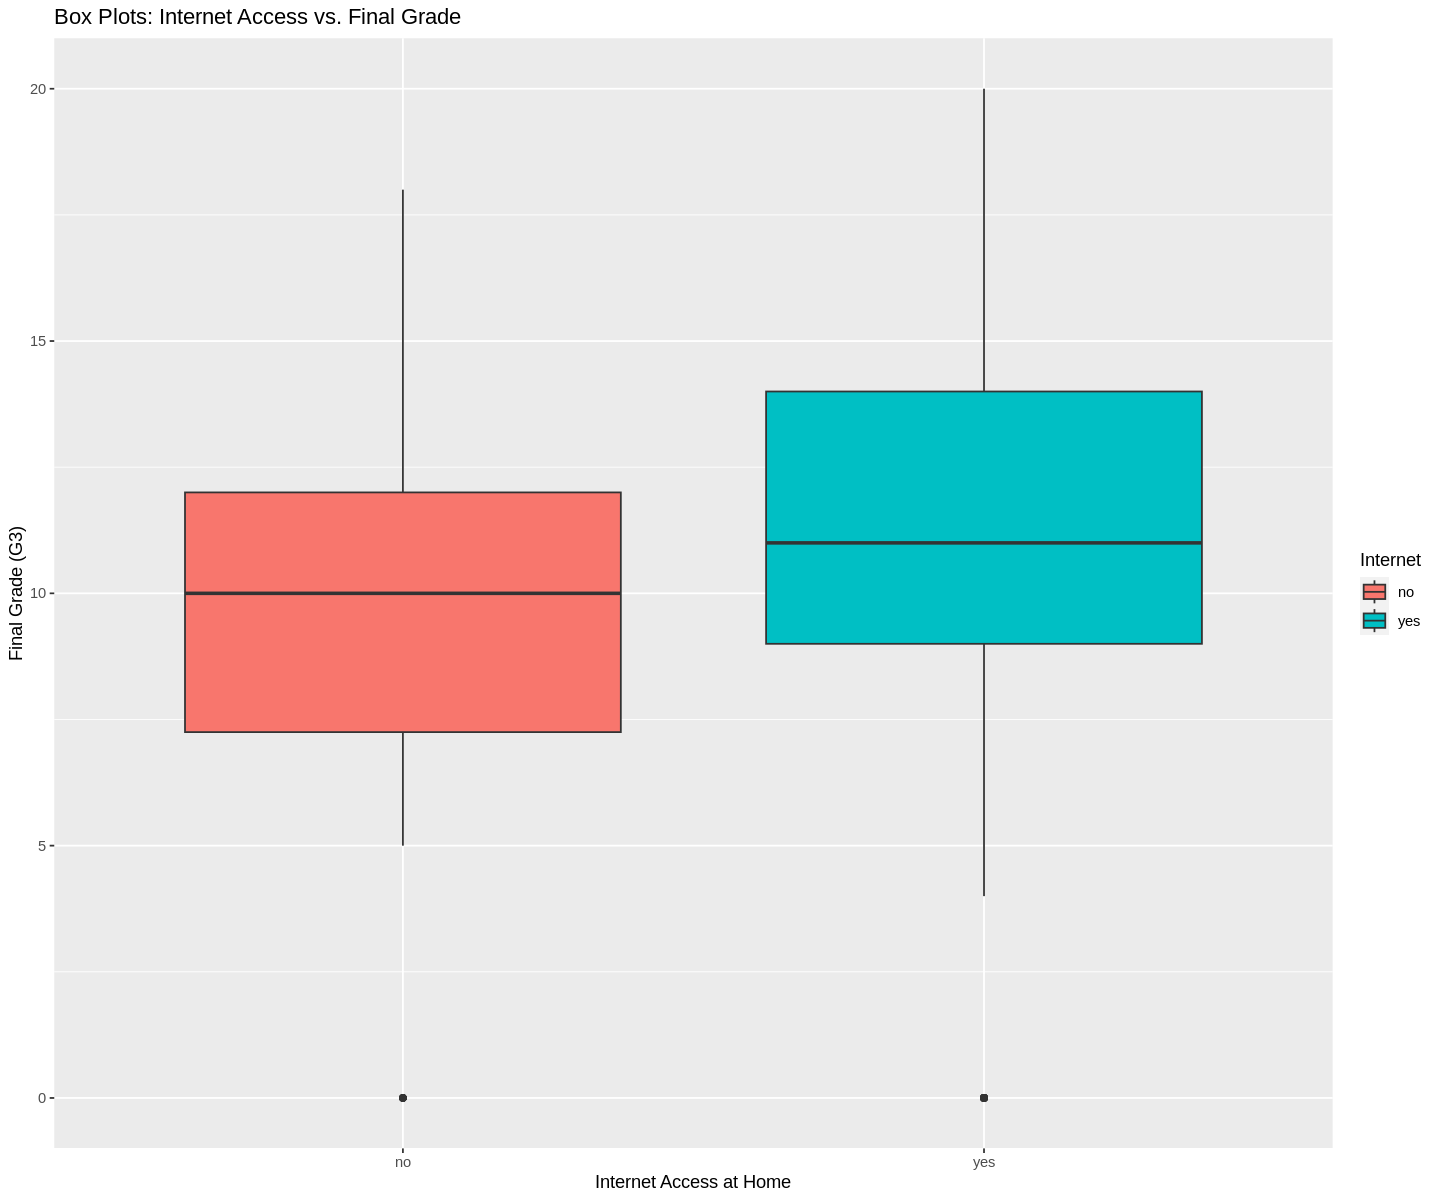

In [90]:
ggplot(data, aes(x = Internet, y = G3, fill = Internet)) +
    geom_boxplot() +
    labs(x = "Internet Access at Home", y = "Final Grade (G3)") +
    ggtitle("Box Plots: Internet Access vs. Final Grade")

**Interpretation**

1. **Central Tendency:** 
   - All three quartiles (lower, middle, upper) are slightly higher for the group with internet access compared to the group without internet access. This indicates that, on average, students with internet access have higher final grades across the board.
<br><br>
2. **Spread of Data:**
   - The lower whisker for the group with internet access is longer, this indicates that there is a wider range of lower final grades in the group with internet access compared to the group without internet access.
   - The upper whiskers are the same for both groups, this suggests that the upper range of final grades is similar for students with and without internet access. The highest final grades achieved by students in both groups are comparable.
<br><br>
3. **Outliers:**
   - Both groups have a dot for outliers at the same location (`0`) of the final grade, indicating that there are data points in both groups with exceptionally low final grades. This suggests that certain students from both groups face similar academic challenges, or perhaps they missed school due to extenuating circumstances.
   - The presence of outliers at the same location underscores that external factors, unrelated to internet access, may impact the academic performance of these students.

In summary, the box plot reveals that students with internet access, on average, perform better in terms of final grades, but there is more variation in lower grades within this group. It also highlights that both groups share similar academic challenges, as indicated by the presence of outliers with exceptionally low final grades.

#### Faceted Bar Chart (Categorical)

Next, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average), and how it varies across additional **categorical/factor** variables in order to identify trends, patterns, and differences in the data.

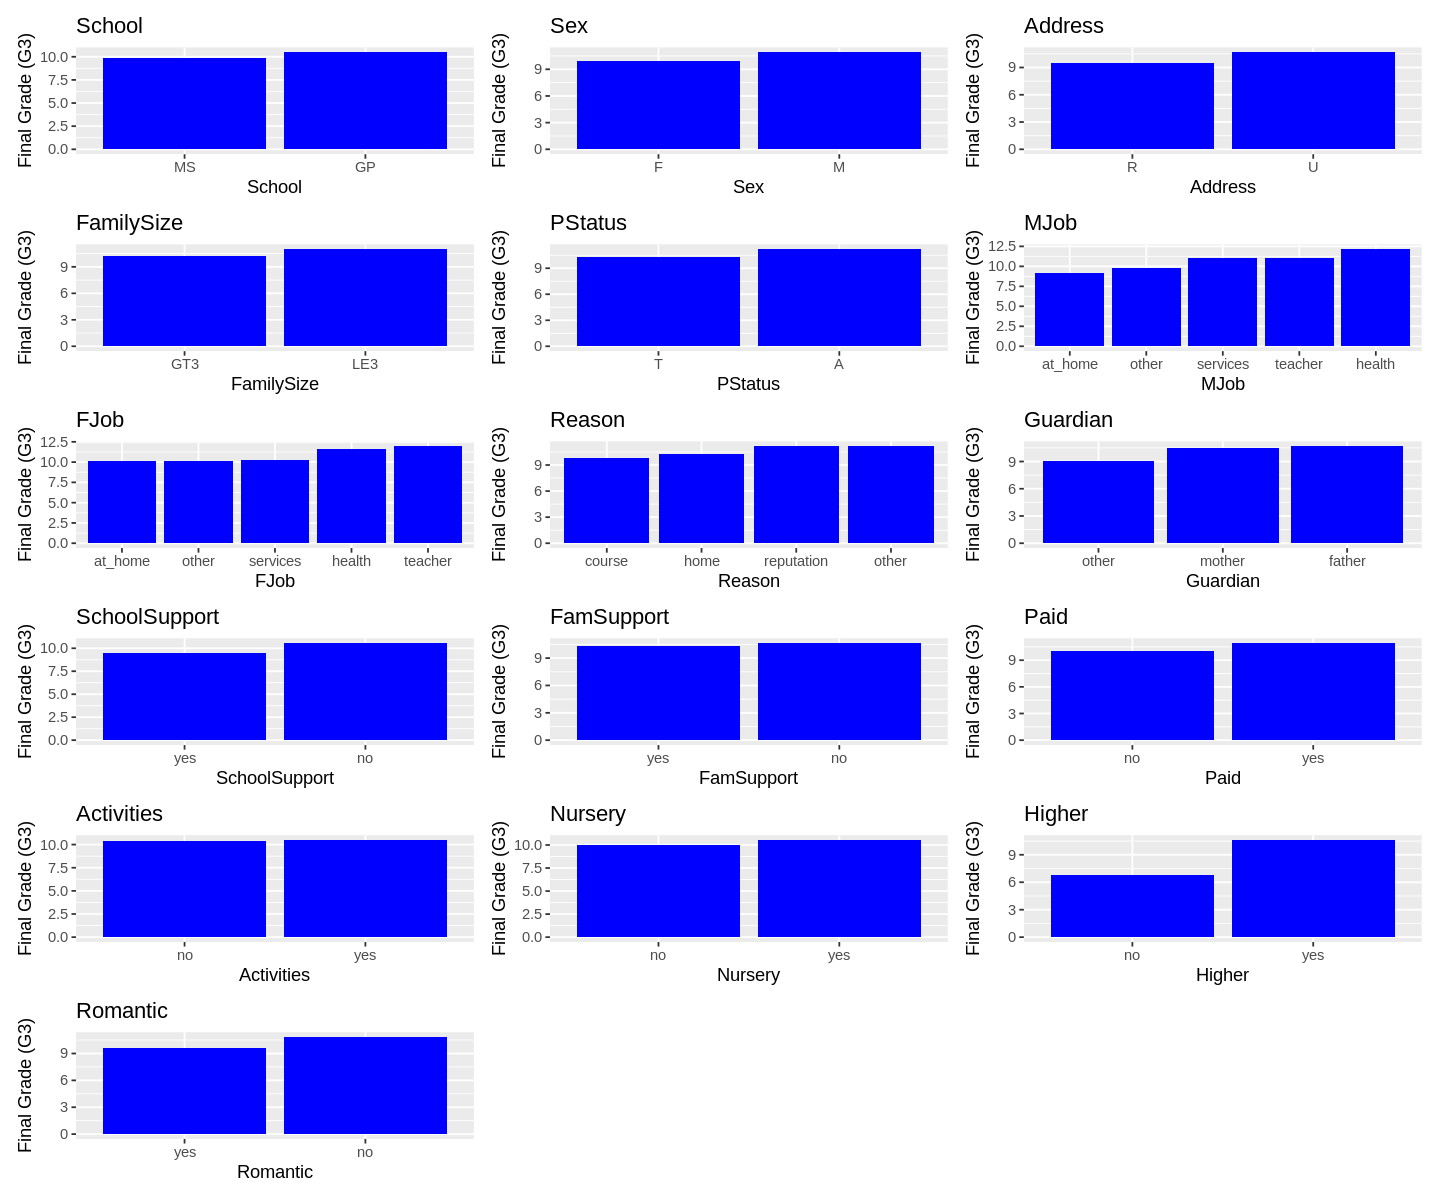

In [91]:
options(repr.plot.width=12, repr.plot.height=10)

#Remove Internet because already explored
data_factor_remaining <- data_factor |>
    select(-Internet)

# Define the variable names for faceting
facet_vars_factor <- colnames(data_factor_remaining)

# Create a list of ggplot objects for each facet
facetbar_factor <- lapply(facet_vars_factor, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE)) |>
        arrange(desc(avg_G3)) |>
        mutate(!!var := reorder(.data[[var]], avg_G3)) #  Re-arrange the factor levels so that they are ordered by the values of avg_G3
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_factor <- wrap_plots(facetbar_factor, ncol = 3)
plot_facetbar_factor


**Interpretation**

*On average*,

1. `School`: Those from the school Gabriel Pereira `GP` have a higher final grade.
2. `Sex`: Males `M` have a higher final grade.
3. `Address`: Those who live in urban parts `U`, have a higher final grade.
4. `FamilySize`: Those from family sizes less than 3 `LE3` have a higher final grade.
5. `PStatus`: Those with parents that live apart `A` have a higher final grade.
6. `MJob`: Those with fathers working in health care related jobs `health` have a higher final grade.
7. `FJob`: Those with mothers working in education `teacher` have a higher final grade.
8. `Reason`: Those that chose their school due to school reputation `reputation` and other reasons `other` have a higher final grade (comparable).
9. `Guardian`: Those whose guardian are their fathers `father` or mothers `mother` have a higher final grade than those with other types `other`.
10. `SchoolSupport`: Those without extra educational support `no` have a higher final grade.
11. `FamSupport`: Those without family educational support `no` have a higher final grade.
12. `Paid`: Those with extra paid classes within the course subject `yes` have a higher final grade.
13. `Activities`: Those who do `yes` an do not engage `no` in extra-curricular activities have no observable difference in final grades.
14. `Nursery`: Those that attended nursery school `yes` have a slightly higher final grade.
15. `Higher`: Those that want to take higher education `yes` have an observably higher final grade.
16. `Romantic`: Those with a romantic relationship `yes` have a lower final grade.

It's important to note that these observations are based on averages and may not necessarily imply causation. Further analysis and exploration are needed to understand the underlying reasons behind these patterns and differences in the dataset.


#### Faceted Bar Chart (Numerical)

Again, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average).

However, we will observe how it varies across **numerical** variables in order to identify trends, patterns, and differences in the data.

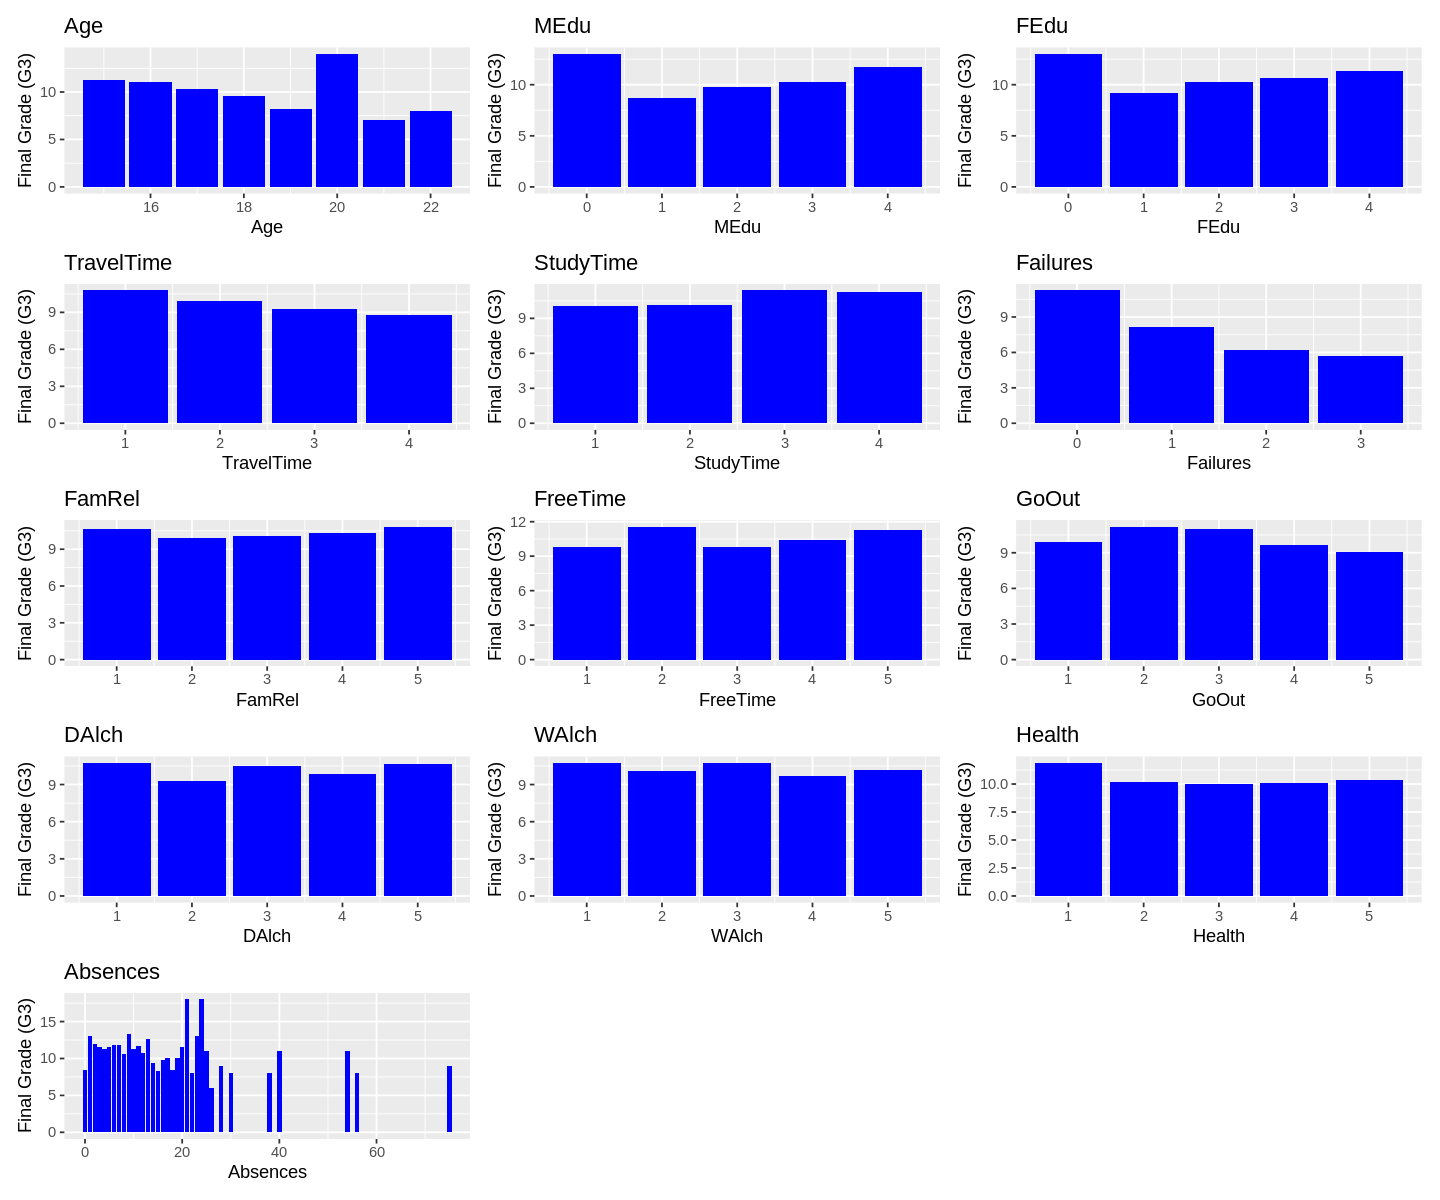

In [97]:
options(repr.plot.width=12, repr.plot.height=10)

data_numeric_dropG3 <- data_numeric |>
    select(-G3)

# Define the variable names for faceting
facet_vars_numeric <- colnames(data_numeric_dropG3)

# Create a list of ggplot objects for each facet
facetbar_numeric <- lapply(facet_vars_numeric, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE))
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_numeric <- wrap_plots(facetbar_numeric, ncol = 3)
plot_facetbar_numeric


**Interpretation**

*On average*,

1. `Age`: Those of age `20` have the highest final grade.
2. `MEdu`: Those whose mother's don't have higher education have the highest grade. However, as the mother's education increases, the students final grade increases.
3. `FEdu`: Same with father's education
4. `TravelTime`: As the home to school travel time increases, the final grade decreases.
5. `StudyTime`: As study time increases, final grade increases. However, once the study time is more than 10 hours, there is no observable increase.
6. `Failures`: As number of past class failures increase, the final grade decreases.
7. `FamRel`: Those with extremely high or extremely low quality of family relationships tend to have higher final grades.
8. `FreeTime`: There is no observable trend in regards to free time after school.
9. `GoOut`: Those that spend an extremely high or extremely low amount of time going out with friends tend to have lower final grades.
10. `DAlch`: There is no observable trend in regards to workday alchohol consumption.
11. `WAlch`: There is no observable trend in regards to weekend alchohol consumption.
12. `Health`: Those with very bad health status tend to have a higher final grade.
13. `Absences`: Those with aroound 20 absences tend to have the highest final grades.

Again, it's important to note that these observations are based on averages and may not necessarily imply causation. Further analysis and exploration are needed to understand the underlying reasons behind these patterns and differences in the dataset.


#### Pair Plots (Again)

After further EDA, we decided to pick the following six.

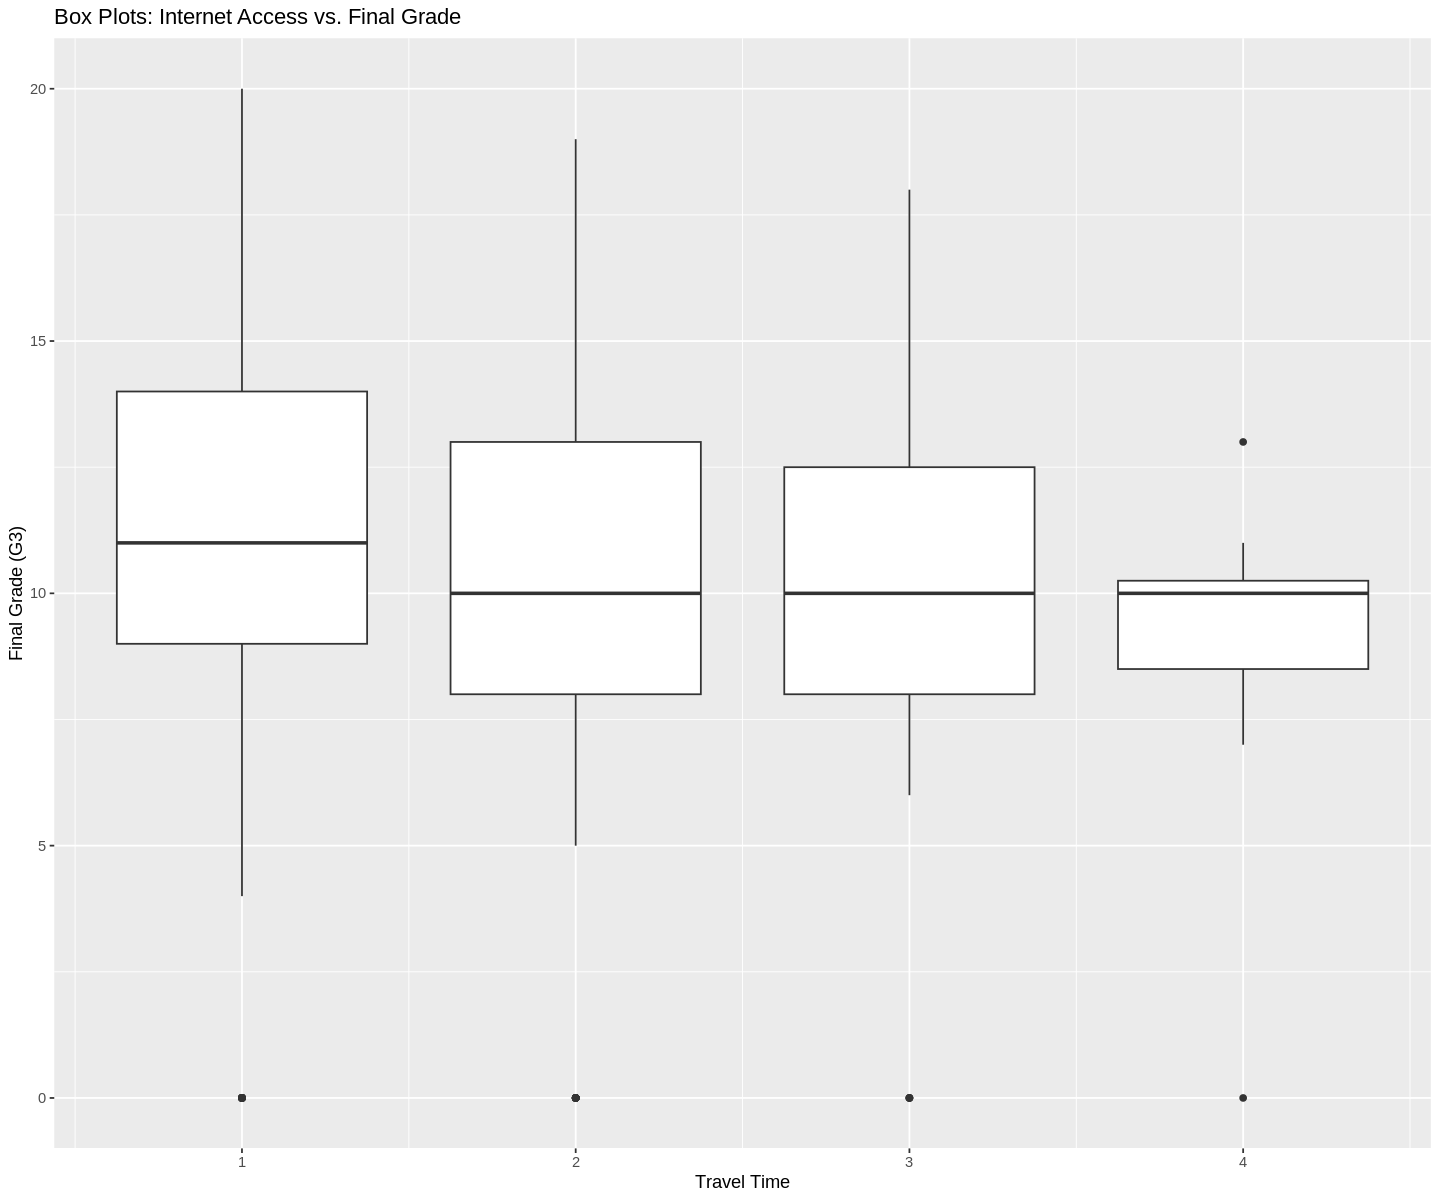

In [104]:
ggplot(data, aes(x = TravelTime, y = G3, group = TravelTime)) +
    geom_boxplot() +
    labs(x = "Travel Time", y = "Final Grade (G3)") +
    ggtitle("Box Plots: Internet Access vs. Final Grade")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


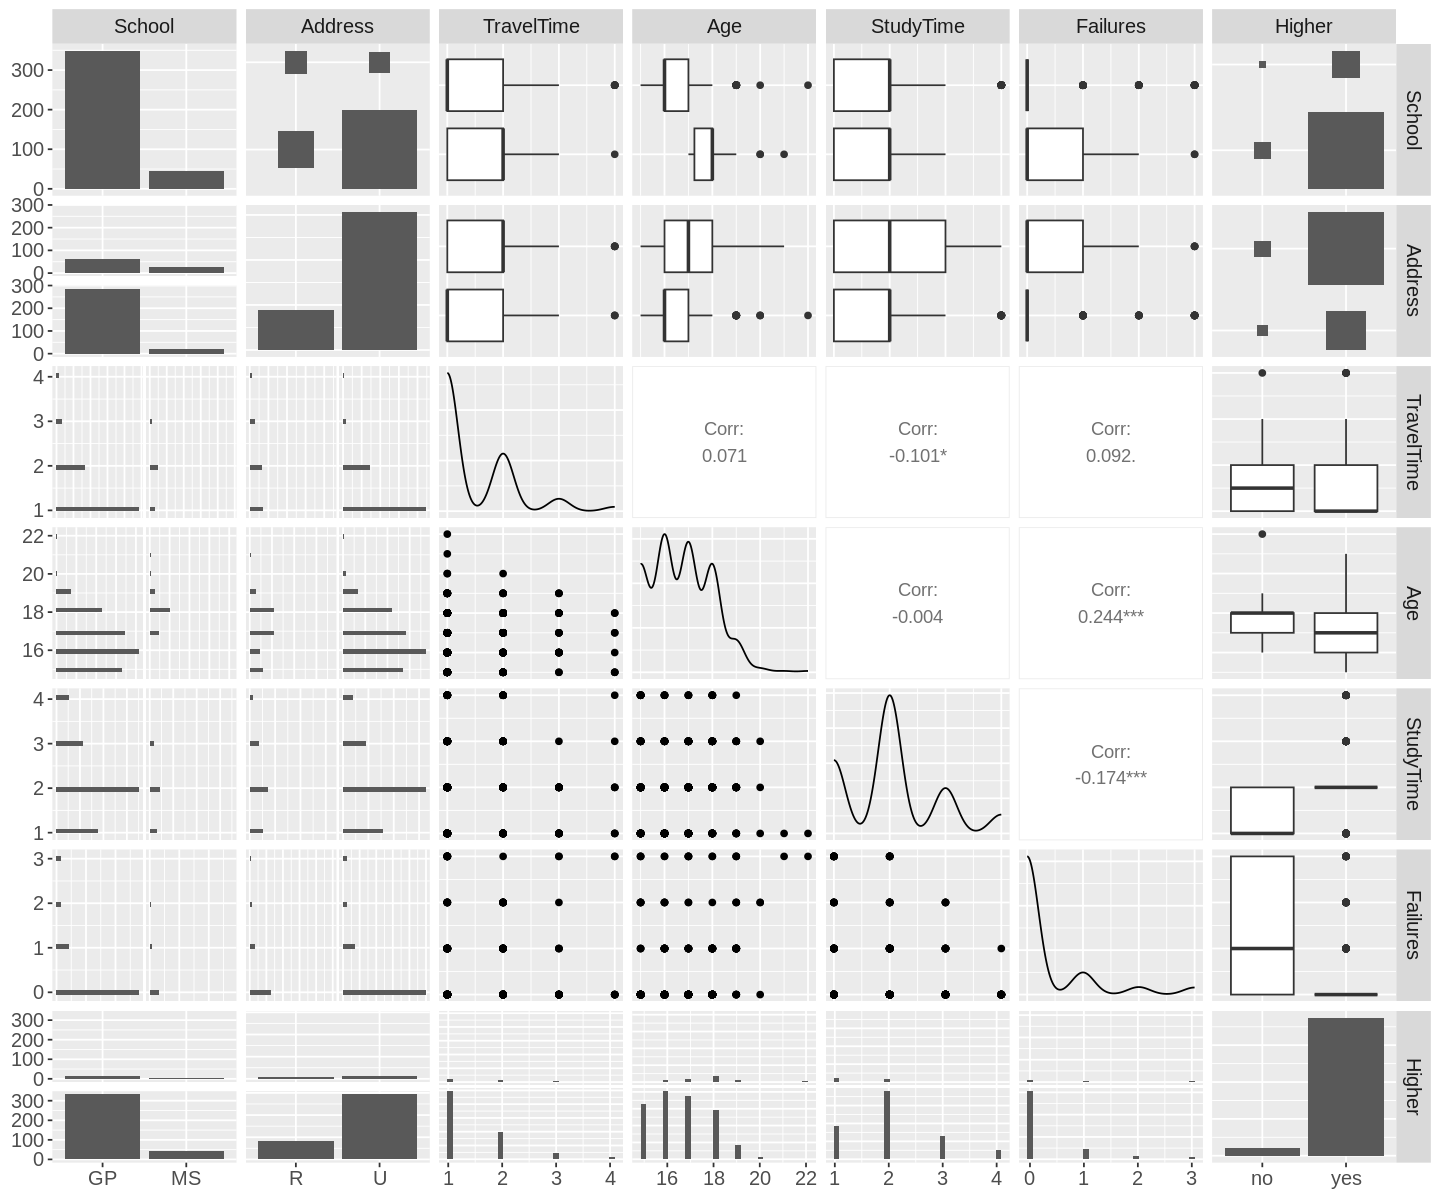

In [99]:
pair_plots_2 <- data |>
    select(School, Address, TravelTime, Age, StudyTime, Failures, Higher) |>
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
pair_plots_2

#### Correlation Plot

Here we are using a correlation plot to explore the relationship between the numerical variables.

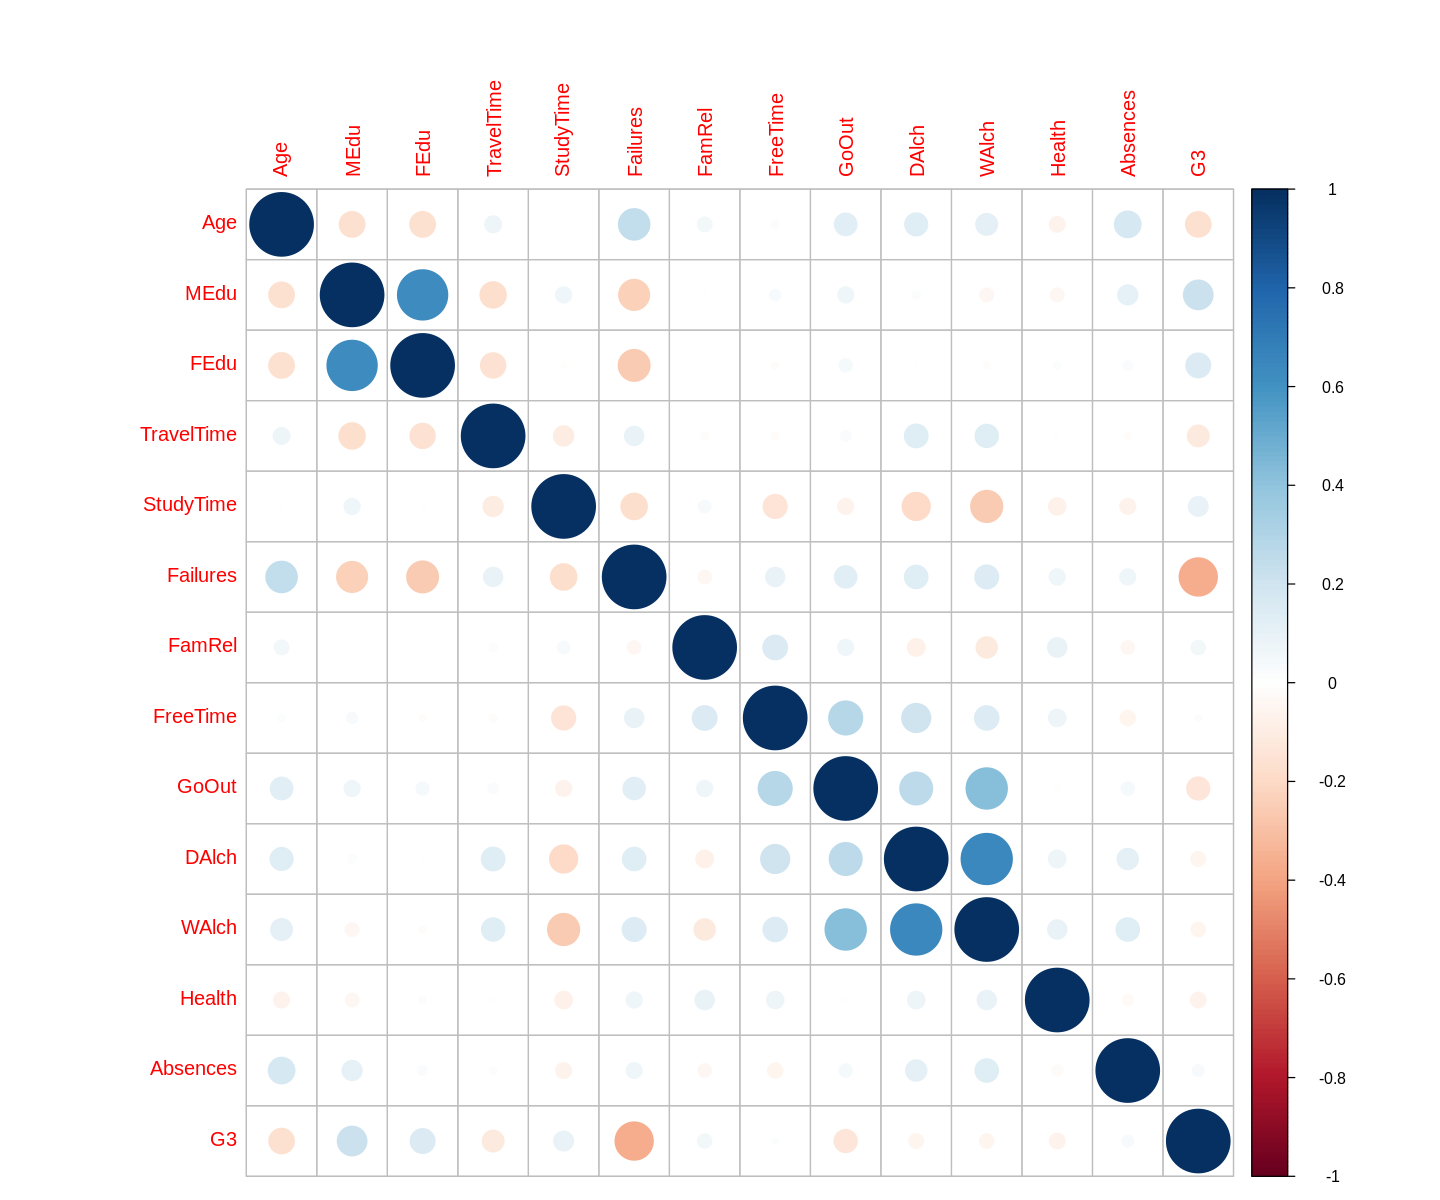

In [110]:
corrplot(cor(data_numeric))

**Interpretation**

1. There is a large positive correlation between `DAlch` and `WAlch`..
2. There is a moderate positive corelation between `GoOut` and `WAlch` and `DAlch`, with `WAlch` being stronger.
3. There is a strong negative correlation between `Failures` and `G3`.
4. There is a moderate negative correlation between `Failures` and `FeEdu` and `FEdu`.
5. There is a large positive correlation between `MEdu` and `FEdu`.

It is essential to be mindful of the presence of multicollinearity, particularly in the cases of `DAlch` between `WAlch`, and `MEdu` between `FEdu`. Their strong positive correlation may result in difficulties when interpreting their individual impacts in regression models later on. We should consider addressing multicollinearity through variable selection to ensure the reliability and interpretability of our analysis later on. 

### Visualization

<span style="color:red"> TODO </span>